# Predicting Housing Prices with Regularized Regression

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [41]:
df=pd.read_csv('udayk.csv')
df

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1982,1.0,3,2.00,133,0,142212
1,1676,1.5,3,0.38,14,1,134865
2,1694,2.0,3,0.96,15,1,118007
3,1800,1.0,2,0.48,49,1,138297
4,2088,1.0,3,1.84,29,1,129470
...,...,...,...,...,...,...,...
1042,1802,2.0,4,0.97,56,1,107695
1043,3239,3.5,4,2.50,1,1,236737
1044,1440,2.0,2,0.61,66,1,154829
1045,2030,2.5,3,1.00,3,1,179492


In [42]:
df.isna().sum()

Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
Price          0
dtype: int64

In [43]:
x=df.iloc[:,0:-1]
x

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,1982,1.0,3,2.00,133,0
1,1676,1.5,3,0.38,14,1
2,1694,2.0,3,0.96,15,1
3,1800,1.0,2,0.48,49,1
4,2088,1.0,3,1.84,29,1
...,...,...,...,...,...,...
1042,1802,2.0,4,0.97,56,1
1043,3239,3.5,4,2.50,1,1
1044,1440,2.0,2,0.61,66,1
1045,2030,2.5,3,1.00,3,1


In [44]:
y=df.iloc[:,-1:]
y

,Price
0,142212
1,134865
2,118007
3,138297
4,129470
...,...
1042,107695
1043,236737
1044,154829
1045,179492


In [45]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.25, random_state=2)

In [25]:
xtrain.shape

(785, 6)

In [46]:
xtest.shape

(262, 6)

In [47]:
ytest.shape

(262, 1)

In [27]:
ytrain.shape

(785, 1)

In [28]:
print("*****Base Regression*****")
print()
print("*****Training Started*****")
print()
base_reg=LinearRegression()
base_reg.fit(xtrain, ytrain)
base_pred=base_reg.predict(xtest)
from sklearn.metrics import r2_score
print('Base Train_score:\t', base_reg.score (xtrain,ytrain))
print()
print('Base Test_Score:\t', base_reg.score (xtest,ytest))
print()
print('R-Square:\t ', r2_score (ytest, base_pred))

*****Base Regression*****

*****Training Started*****

Base Train_score:	 0.643548275810008

Base Test_Score:	 0.6519451449264311

R-Square:	  0.6519451449264311


In [35]:
print("*************Lasso Regression Model*************")
print()
print("************Training Started********************")
print()
lr=Lasso(alpha=0.01)
lr.fit(xtrain,ytrain)
lr_pred=lr.predict(xtest)
print("Lasso Train Score:\t ", lr.score(xtrain,ytrain))
print()
print("Lasso Test Score:\t ", lr.score(xtest,ytest))
print()
print("Lasso R-Square:\t ", r2_score (ytest, lr_pred))

*************Lasso Regression Model*************

************Training Started********************

Lasso Train Score:	  0.6435482758096451

Lasso Test Score:	  0.6519450245090761

Lasso R-Square:	  0.6519450245090761


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Squared Error: \t', mean_squared_error(ytest, lr_pred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, lr_pred)))
print()
print("Mean Absolute Error: \t",mean_absolute_error(ytest,lr_pred))


Mean Squared Error: 	 1588372341.8579717

RMSE: 	 39854.38924206431

Mean Absolute Error: 	 28294.15983136759


In [37]:
print("*************Ridge Regression Model*************")
print()
print("************Training Started********************")
print()
rr=Ridge(alpha=0.01)
rr.fit(xtrain,ytrain)
rr_pred=rr.predict(xtest)
print("Lasso Train Score:\t ", rr.score(xtrain,ytrain))
print()
print("Lasso Test Score:\t ", rr.score(xtest,ytest))
print()
print("Lasso R-Square:\t ", r2_score (ytest, rr_pred))

*************Ridge Regression Model*************

************Training Started********************

Lasso Train Score:	  0.6435482757550582

Lasso Test Score:	  0.6519438594699876

Lasso R-Square:	  0.6519438594699876


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Squared Error: \t', mean_squared_error(ytest, rr_pred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, rr_pred)))
print()
print("Mean Absolute Error: \t",mean_absolute_error(ytest,rr_pred))

Mean Squared Error: 	 1588377658.5923839

RMSE: 	 39854.45594400184

Mean Absolute Error: 	 28294.159049408532


# Diagnosing and Remedying Heteroscedasticity and Multicollinearity

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('Employees.csv')
df.head()

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects,PerformanceRating
0,1,41,Female,Sales,Sales Executive,2,8,6,3
1,2,49,Male,Research & Development,Research Scientist,1,10,10,4
2,4,37,Male,Research & Development,Laboratory Technician,2,7,9,3
3,5,33,Female,Research & Development,Research Scientist,4,8,8,3
4,7,27,Male,Research & Development,Laboratory Technician,1,6,2,3


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Education']=le.fit_transform(df['Education'])
df['Department']=le.fit_transform(df['Department'])
df['JobRole']=le.fit_transform(df['JobRole'])
df.head()

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects,PerformanceRating
0,1,41,0,2,7,1,8,6,3
1,2,49,1,1,6,0,10,10,4
2,4,37,1,1,2,1,7,9,3
3,5,33,0,1,6,3,8,8,3
4,7,27,1,1,2,0,6,2,3


In [51]:
X=df.iloc[:,5:-1]
X

,Education,Experience,No. of Projects
0,1,8,6
1,0,10,10
2,1,7,9
3,3,8,8
4,0,6,2
...,...,...,...
1465,1,17,5
1466,0,9,7
1467,2,6,6
1468,2,17,9


In [52]:
Y=df.iloc[:,-1:]
Y

,PerformanceRating
0,3
1,4
2,3
3,3
4,3
...,...
1465,3
1466,3
1467,4
1468,3


In [53]:
import sklearn
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=2)

In [18]:
Xtrain.shape

(1102, 3)

In [19]:
Ytest.shape

(368, 1)

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(Xtrain,Ytrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
Ypred=lin_reg.predict(Xtest)
print('Predict Total Payment\n',Ypred)
print('\n Testing is also Completed...\n')

Training Started...



Training Completed.....


Testing invoked....

Predict Total Payment
 [[3.16025615]
 [3.14562346]
 [3.154249  ]
 [3.14890122]
 [3.14678481]
 [3.1536195 ]
 [3.14712922]
 [3.15606739]
 [3.1464116 ]
 [3.16613811]
 [3.14027928]
 [3.15867753]
 [3.15743505]
 [3.14993507]
 [3.15195976]
 [3.15635715]
 [3.15300652]
 [3.17832524]
 [3.17044146]
 [3.14392199]
 [3.16228677]
 [3.15259159]
 [3.14479359]
 [3.15233297]
 [3.15026655]
 [3.15511234]
 [3.15768541]
 [3.17637341]
 [3.1527479 ]
 [3.15353605]
 [3.16870652]
 [3.17044146]
 [3.15399271]
 [3.14894295]
 [3.17405664]
 [3.155569  ]
 [3.14632815]
 [3.15569418]
 [3.15403444]
 [3.15697839]
 [3.16543109]
 [3.14533137]
 [3.14475186]
 [3.14960358]
 [3.16447837]
 [3.16328588]
 [3.15349432]
 [3.17164454]
 [3.15984354]
 [3.16021675]
 [3.16104662]
 [3.14587149]
 [3.14466841]
 [3.14632815]
 [3.17251614]
 [3.16319183]
 [3.16323356]
 [3.14437865]
 [3.15346086]
 [3.14549828]
 [3.15395098]
 [3.14757063]
 [3.15436592]
 [3.15585876]
 [3.15035  

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(Ytest, Ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(Ytest,Ypred)))
print()
print('Variance Score:\t',explained_variance_score (Ytest,Ypred))
print()
print('R_Square: \t', r2_score(Ytest,Ypred))

Mean Squared Error: 	 0.12335151094054296

RMSE: 	 0.3512143376067426

Variance Score:	 0.0006678334131190455

R_Square: 	 -0.0005843077335783153


In [57]:
residuals=Ytest-Ypred
residuals

,PerformanceRating
721,-0.160256
843,0.854377
627,0.845751
1368,-0.148901
305,-0.146785
...,...
1230,-0.172516
995,-0.159844
682,0.846464
215,-0.157558


array([[<Axes: title={'center': 'PerformanceRating'}>]], dtype=object)

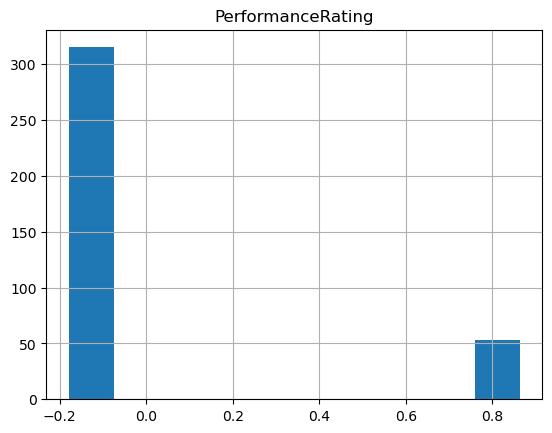

In [31]:
residuals.hist()

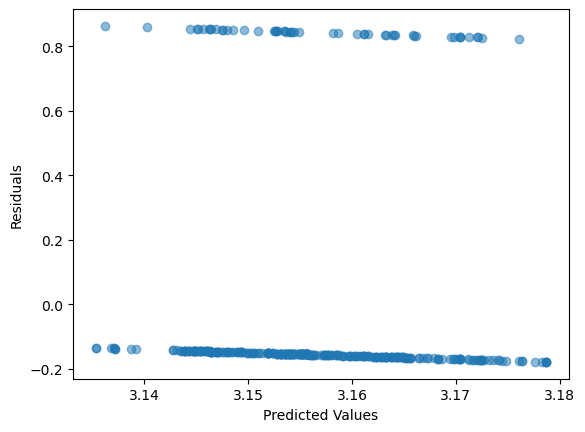

In [36]:
plt.scatter(ypred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Text(0, 0.5, 'Residuals')

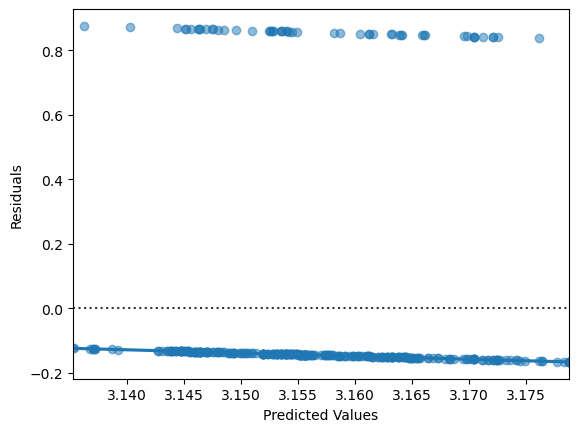

In [37]:
sns.residplot(x=ypred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

In [60]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan
exog_with_const = sm.add_constant(Ypred)
lm, p_lm, f_lm, fp_lm = het_breuschpagan(residuals, exog_with_const)
# Print the results
print("Breusch-Pagan Test:")
print(f"LM Statistic: {lm}")
print(f"P-value: {p_lm}")

Breusch-Pagan Test:
LM Statistic: 0.25017783299044183
P-value: 0.6169498876175828


In [23]:
Xd=df.iloc[:,0:-1]
Xd

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects
0,1,41,0,2,7,1,8,6
1,2,49,1,1,6,0,10,10
2,4,37,1,1,2,1,7,9
3,5,33,0,1,6,3,8,8
4,7,27,1,1,2,0,6,2
...,...,...,...,...,...,...,...,...
1465,2061,36,1,1,2,1,17,5
1466,2062,39,1,1,0,0,9,7
1467,2064,27,1,1,4,2,6,6
1468,2065,49,1,2,7,2,17,9


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [25]:
cd=calc_vif(Xd)
cd

,variables,VIF
0,EmployeeNumber,3.588630
1,Age,16.717821
2,Gender,2.367218
3,Department,11.410645
4,JobRole,7.792705
5,Education,4.587913
6,Experience,8.015931
7,No. of Projects,3.847793


In [29]:
Xm=df.drop(['Education', 'Department'],axis=1)
calc_vif(Xm)

,variables,VIF
0,EmployeeNumber,3.775801
1,Age,27.675932
2,Gender,2.460621
3,JobRole,4.147331
4,Experience,8.716401
5,No. of Projects,3.929664
6,PerformanceRating,22.258983


In [61]:
print("*************Lasso Regression Model*************")
print()
print("************Training Started********************")
print()
lr=Lasso(alpha=0.01)
lr.fit(Xtrain,Ytrain)
lr_pred=lr.predict(Xtest)
print("Lasso Train Score:\t ", lr.score(Xtrain,Ytrain))
print()
print("Lasso Test Score:\t ", lr.score(Xtest,Ytest))
print()
print("Lasso R-Square:\t ", r2_score (Ytest, lr_pred))

*************Lasso Regression Model*************

************Training Started********************

Lasso Train Score:	  9.608698707919139e-06

Lasso Test Score:	  -0.0013336313244978193

Lasso R-Square:	  -0.0013336313244978193
